In [1520]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

In [1521]:
df = pd.read_html("https://fbref.com/en/squads/19538871/Manchester-United-Stats", attrs = {"id": "stats_gca_9"})[0]

In [1522]:
df.columns = df.columns.droplevel(0)  

In [1523]:
df = df[[
    'Player', 'Pos', 'Age', 'SCA', 'SCA90', 'GCA', 'GCA90'
]]

df.rename(columns={'SCA90': 'SCA/90', 'GCA90': 'GCA/90'}, inplace=True)




In [1524]:
df['Age'] = df['Age'].str.split('-').str[0]
df = df.drop(df[df['Player'].isin(['Squad Total', 'Opponent Total', "Scott McTominay", "Victor Lindelöf", "Luke Shaw", "Tyrell Malacia", "Toby Collyer", "Jonny Evans"])].index)


In [1525]:
df.sort_values(by=['SCA/90', 'GCA/90'], ascending=[False, False], inplace=True)


In [1526]:
bg_color = "#FFFFFF"
text_colour = "#000000"

plt.rcParams["text.color"] = text_colour
plt.rcParams["font.family"] = "monospace"

df.columns

Index(['Player', 'Pos', 'Age', 'SCA', 'SCA/90', 'GCA', 'GCA/90'], dtype='object')

In [1527]:
col_defs = [
    ColumnDefinition(
        name="Player",
        textprops={"ha": "left", "weight": "bold"},
        width=1.5
    ),
    ColumnDefinition(
        name="Pos",
        textprops={"ha": "center"},
        width=1
    ),
    ColumnDefinition(
        name="Age",
        textprops={"ha": "center"},
        width=1
    ),
    ColumnDefinition(
        name="SCA",
        group="Shot Creating Actions",
        textprops={"ha": "center"},
        width=1
    ),
    ColumnDefinition(
        name="SCA/90",
        group="Shot Creating Actions",
        textprops={"ha": "center", "color": text_colour, "weight": "bold", "bbox": {"boxstyle": "circle", "pad": .35}},
        cmap=normed_cmap(df["SCA/90"], cmap=matplotlib.cm.PiYG, num_stds=2),
        width=1
    ),
    ColumnDefinition(
        name="GCA",
        group="Goal Creating Actions",
        textprops={"ha": "center"},
        width=1
    ),
    ColumnDefinition(
        name="GCA/90",
        group="Goal Creating Actions",
        textprops={"ha": "center", "color": text_colour, "weight": "bold", "bbox": {"boxstyle": "circle", "pad": .35}},
        cmap=normed_cmap(df["GCA/90"], cmap=matplotlib.cm.PiYG, num_stds=2)
    }
]


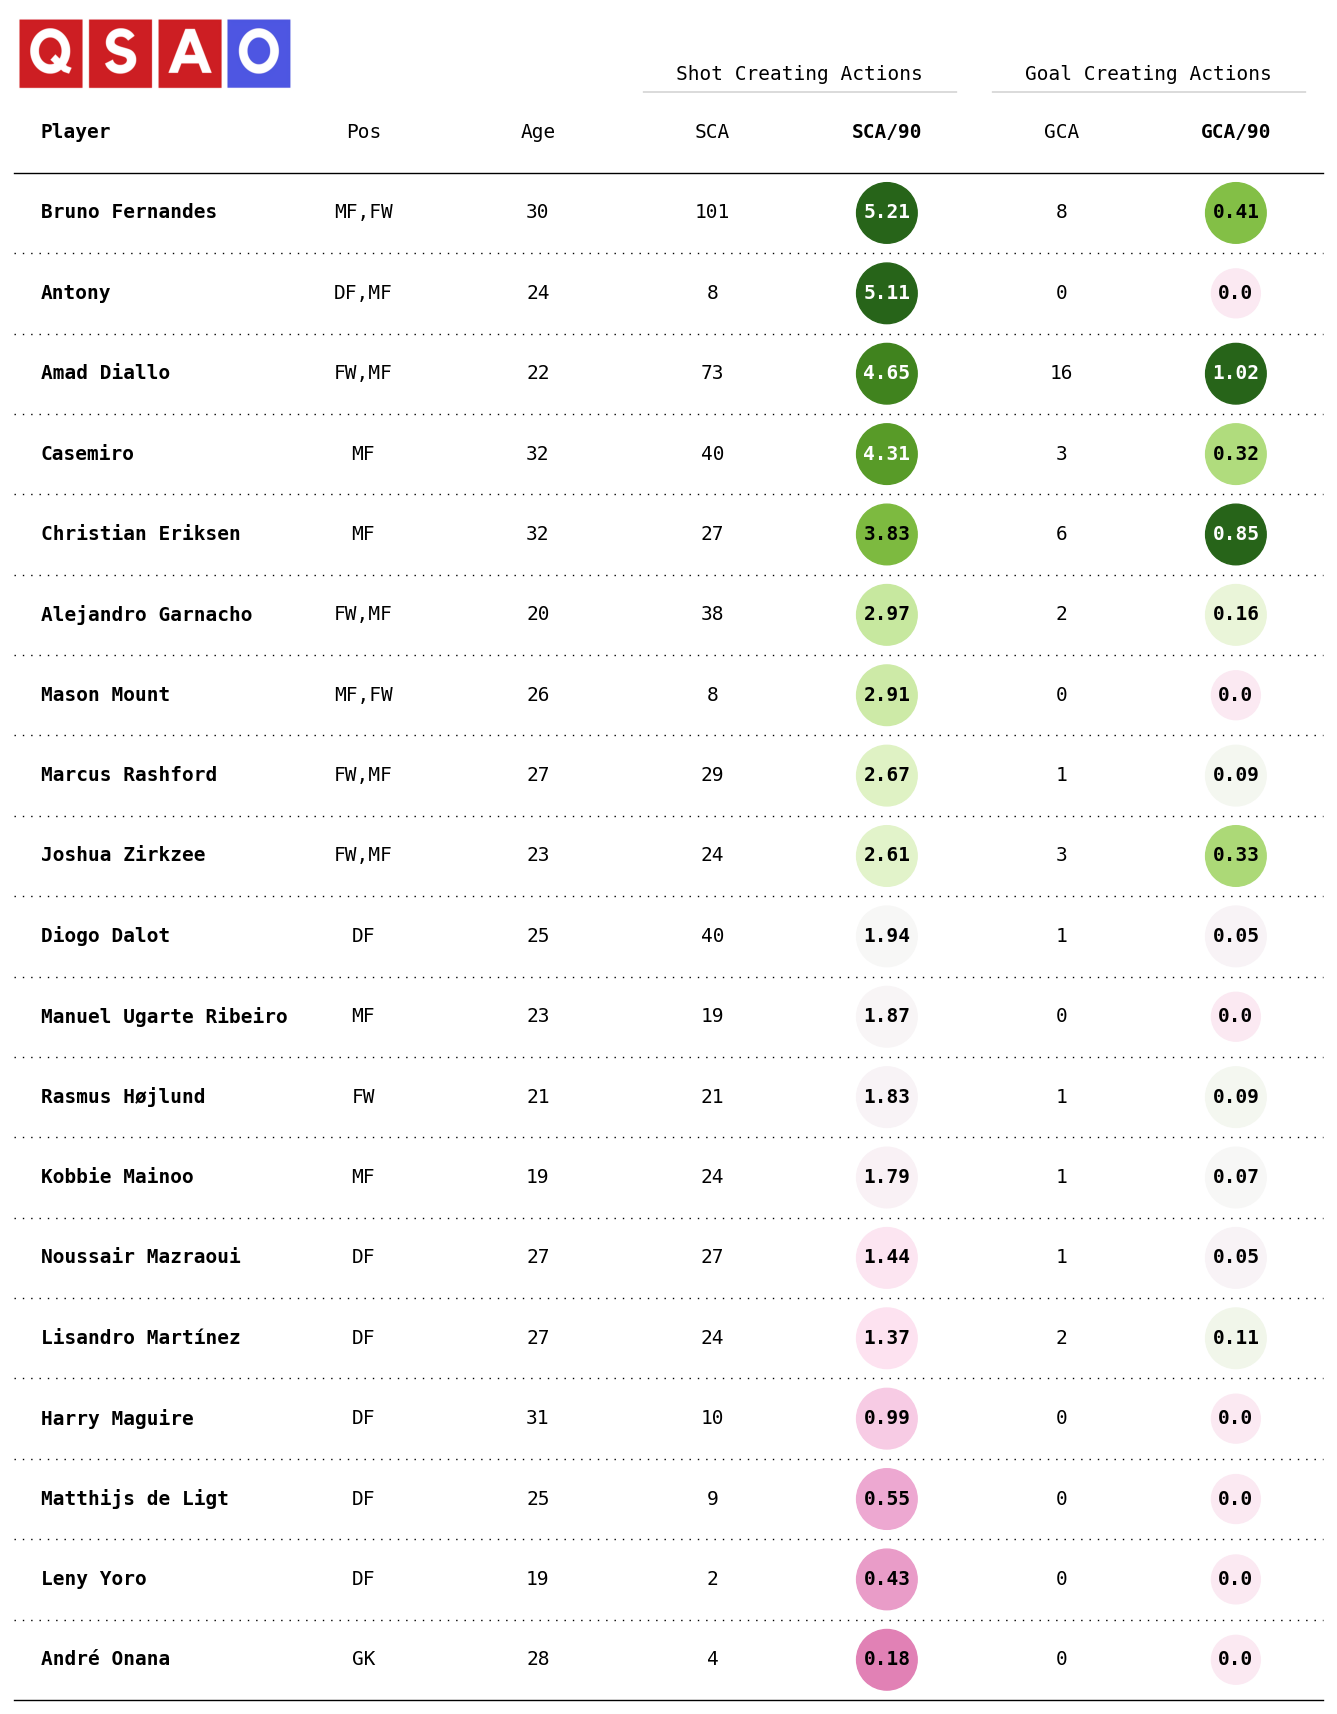

In [1528]:
fig, ax = plt.subplots(figsize = (17,22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

logo = mpimg.imread('/Users/qaischatur/Downloads/QSAOlogo.png')

df = df.reset_index(drop=True)  # Resets index and removes it
table = Table(
    df,
    column_definitions = col_defs,
    index_col="Player",
    row_dividers = True,
    row_divider_kw= {"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider = True,
    textprops = {"fontsize": 14},
    ax = ax
).autoset_fontcolors(colnames=["GCA/90", "SCA/90"])

image_ax = inset_axes(ax, width="21%", height="4.4%", loc="upper left")

image_ax.imshow(logo, aspect='auto')
image_ax.axis('off') 

plt.show()

In [1529]:
fig.savefig(
    "/Users/qaischatur/Desktop/manutd_creativityFig.png",
    facecolor=ax.get_facecolor(),
    dpi=200,
    bbox_inches = "tight"
)